In [18]:
import random
import math
from tqdm import tqdm

N = 5000 # Tamaño del grafo
min_deg = 3
max_deg = 1000
output_file = f"grafo_denso_{N}.txt"  

# Probabilidad decrece con la distancia
def connection_probability(i, j):
    d = abs(i - j)
    return math.exp(-d / (N / 5))  # Ajusta escala según cuán "local" quieras la conexión

edges = set()
degrees = {i: 0 for i in range(1, N + 1)}

# Configurar barra de progreso
pbar = tqdm(total=N, desc="Generando grados mínimos", unit="nodo")
cumplidos = set()

while len(cumplidos) < N:
    i = random.randint(1, N)
    j = random.randint(1, N)
    if i == j or (i, j) in edges or (j, i) in edges:
        continue
    if degrees[i] >= max_deg or degrees[j] >= max_deg:
        continue
    prob = connection_probability(i, 4999)
    if random.random() < prob:
        edges.add((i, j))
        degrees[i] += 1
        degrees[j] += 1

        for node in (i, j):
            if degrees[node] >= min_deg and node not in cumplidos:
                cumplidos.add(node)
                pbar.update(1)

pbar.close()

# Convertir nodos a formato tipo "n1", "n2"
formatted_edges = [("n" + str(i), "n" + str(j)) for (i, j) in edges]

# Guardar en archivo
with open(output_file, "w") as f:
    for (i, j) in formatted_edges:
        f.write(f"({i},{j})\n")

print(f"{len(formatted_edges)} arcos generados y guardados en '{output_file}'.")


Generando grados mínimos: 100%|██████████| 5000/5000 [00:01<00:00, 4159.62nodo/s] 

62303 arcos generados y guardados en 'grafo_denso_5000.txt'.


## GENERADOR DENSO

In [1]:
import random
from tqdm import tqdm

# --- Configuración del Grafo ---
N = 5001  # Tamaño total del grafo (número de nodos)
output_file = f"grafo_denso_hibrido_{N}.txt"

# --- Definición de la Densidad ---
# Nodos que serán densos
nodos_densos_fin = N - 200
# Grado objetivo para los diferentes grupos de nodos
grado_objetivo_denso = 1000
grado_objetivo_disperso = 25

# --- Inicialización de Estructuras de Datos ---
edges = set()
# Usamos un diccionario para rastrear el grado de cada nodo (1 a N)
degrees = {i: 0 for i in range(1, N + 1)}

print(f"Generando {nodos_densos_fin} nodos densos con ~{grado_objetivo_denso} conexiones...")

# --- Fase 1: Generar la parte densa del grafo ---
# Iteramos sobre cada nodo que debe ser denso
for i in tqdm(range(1, nodos_densos_fin + 1), desc="Nodos Densos"):
    # Agregamos conexiones hasta que el nodo alcance su grado objetivo
    while degrees[i] < grado_objetivo_denso:
        # Elegimos un nodo j al azar para conectar
        # Puede conectarse a cualquier otro nodo del grafo
        j = random.randint(1, N)

        # Validaciones para crear una conexión válida
        if i == j:
            continue  # Evitar bucles (un nodo conectado a sí mismo)
        if (i, j) in edges or (j, i) in edges:
            continue  # La arista ya existe

        # Creamos la arista
        # Almacenamos la tupla ordenada para simplificar la búsqueda
        edge = tuple(sorted((i, j)))
        edges.add(edge)

        # Actualizamos el grado de ambos nodos
        degrees[i] += 1
        degrees[j] += 1

print(f"Generando 200 nodos dispersos con ~{grado_objetivo_disperso} conexiones...")

# --- Fase 2: Generar la parte dispersa del grafo ---
# Iteramos sobre los últimos 200 nodos
for i in tqdm(range(nodos_densos_fin + 1, N + 1), desc="Nodos Dispersos"):
    # Agregamos conexiones hasta que el nodo alcance su grado objetivo
    while degrees[i] < grado_objetivo_disperso:
        # Elegimos un nodo j al azar para conectar
        j = random.randint(1, N)

        # Validaciones
        if i == j:
            continue
        # Usamos la tupla ordenada para la verificación
        edge_to_check = tuple(sorted((i, j)))
        if edge_to_check in edges:
            continue

        # Creamos la arista y actualizamos grados
        edges.add(edge_to_check)
        degrees[i] += 1
        degrees[j] += 1

# --- Fase 3: Formatear y Guardar el Resultado ---
# Convertir nodos a formato "n1", "n2", etc.
formatted_edges = [("n" + str(u), "n" + str(v)) for (u, v) in edges]

# Guardar en archivo de texto
try:
    with open(output_file, "w") as f:
        for (u, v) in formatted_edges:
            f.write(f"({u},{v})\n")
    print(f"\n¡Éxito! {len(formatted_edges)} arcos generados y guardados en '{output_file}'.")
except IOError as e:
    print(f"\nError al escribir en el archivo '{output_file}': {e}")

# Opcional: Imprimir estadísticas de los grados para verificar
# print("\nEstadísticas de grados generados:")
# grados_densos = [degrees[i] for i in range(1, nodos_densos_fin + 1)]
# grados_dispersos = [degrees[i] for i in range(nodos_densos_fin + 1, N + 1)]
# print(f"Grado promedio (nodos densos): {sum(grados_densos) / len(grados_densos):.2f}")
# print(f"Grado promedio (nodos dispersos): {sum(grados_dispersos) / len(grados_dispersos):.2f}")



Generando 4801 nodos densos con ~1000 conexiones...


Nodos Densos: 100%|██████████| 4801/4801 [00:07<00:00, 613.94it/s]


Generando 200 nodos dispersos con ~25 conexiones...


Nodos Dispersos: 100%|██████████| 200/200 [00:00<00:00, 1064544.16it/s]



¡Éxito! 3022654 arcos generados y guardados en 'grafo_denso_hibrido_5001.txt'.


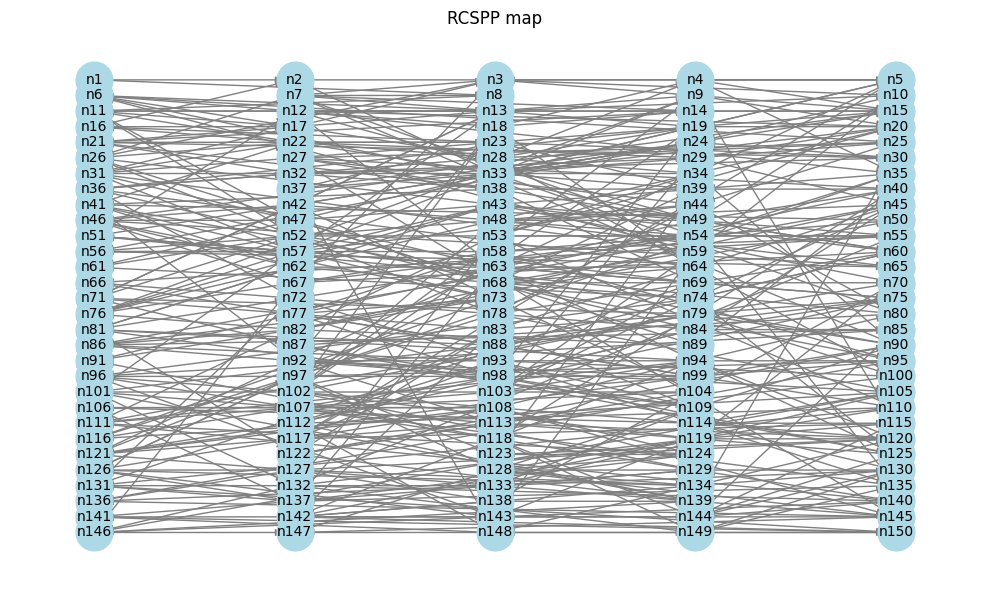

In [18]:
import networkx as nx
import matplotlib.pyplot as plt
import math

# Leer los arcos como antes
def leer_arcos(nombre_archivo):
    with open(nombre_archivo, 'r') as f:
        lineas = f.readlines()
    arcos = []
    for linea in lineas:
        if '(' in linea:
            partes = linea.strip().replace('(', '').replace(')', '').split()
            for p in partes:
                try:
                    i, j = p.split(',')
                    i = i.strip()
                    j = j.strip()
                    # Ensure both nodes are valid
                    if i.isalnum() and j.isalnum():
                        arcos.append((i, j))
                except ValueError:
                    # Skip invalid entries
                    continue
    return arcos

# Lista de nodos en orden
def extraer_nodos(arcos):
    nodos = set()
    for i, j in arcos:
        nodos.add(i)
        nodos.add(j)
    return sorted(nodos, key=lambda x: int(x[1:]))  # Asume formato 'n1', 'n2', ...

# Posiciones en cuadrícula
def posiciones_en_cuadricula(nodos, columnas=6):
    pos = {}
    for idx, nodo in enumerate(nodos):
        fila = idx // columnas
        col = idx % columnas
        pos[nodo] = (col, -fila)  # invertimos fila para que vaya de arriba hacia abajo
    return pos

# Cargar datos
arcos = leer_arcos("grafo_150.txt")
nodos = extraer_nodos(arcos)
pos = posiciones_en_cuadricula(nodos, columnas=5)

# Crear y dibujar el grafo
G = nx.DiGraph()
G.add_edges_from(arcos)

plt.figure(figsize=(10, 6))
nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=700)
nx.draw_networkx_edges(G, pos, edge_color='gray')
nx.draw_networkx_labels(G, pos, font_size=10)
plt.title("RCSPP map")
plt.axis('off')
plt.tight_layout()
plt.show()


In [2]:
import random

# Leer arcos desde el archivo
def leer_arcos(archivo):
    with open(archivo, 'r') as f:
        lineas = f.readlines()
    arcos = []
    nodos = set()
    for linea in lineas:
        if '(' in linea:
            linea = linea.strip().replace('(', '').replace(')', '').replace(',', ' ')
            i, j = linea.split()
            arcos.append((i, j))
            nodos.update([i, j])
    return sorted(nodos), arcos

# Asignar valores aleatorios para dist, time, resource
def generar_parametros(arcos, seed=42):
    random.seed(seed)
    dist = {}
    time = {}
    resource = {}
    for (i, j) in arcos:
        dist[(i, j)] = random.randint(1, 5)
        time[(i, j)] = random.randint(2, 6)
        resource[(i, j)] = random.randint(1, 4)
    return dist, time, resource

# Generar parámetros por nodo
def generar_por_nodo(nodos, forbid_n=2, require_n=2, seed=42):
    random.seed(seed)
    risk = {n: round(random.uniform(0, 0.6), 1) for n in nodos}
    earliest = {n: 0 for n in nodos}
    latest = {n: 999 for n in nodos}

    # Seleccionamos nodos para ventanas de tiempo
    elegibles = [n for n in nodos if n not in ('n1', 'n20')]
    tw_nodes = random.sample(elegibles, 2)
    earliest[tw_nodes[0]] = 10
    latest[tw_nodes[0]] = 15
    earliest[tw_nodes[1]] = 12
    latest[tw_nodes[1]] = 18

    # Seleccionamos nodos obligatorios y prohibidos (excluyendo n1 y n20)
    restantes = [n for n in elegibles if n not in tw_nodes]
    forbidden = random.sample(restantes, forbid_n)
    restantes = [n for n in restantes if n not in forbidden]
    required = random.sample(restantes, require_n)

    return risk, earliest, latest, forbidden, required

# Escribir archivo .dat
def escribir_dat(nombre_archivo, nodos, arcos, dist, time, resource, risk, earliest, latest, forbidden, required):
    with open(nombre_archivo, 'w') as f:
        f.write("set NODES :=\n    " + " ".join(nodos) + ";\n\n")

        f.write("set ARCS :=\n")
        for i, (a, b) in enumerate(arcos):
            sep = "    " if i % 6 == 0 else " "
            f.write(f"{sep}({a},{b})")
            if (i + 1) % 6 == 0:
                f.write("\n")
        if len(arcos) % 6 != 0:
            f.write("\n")
        f.write(";\n\n")

        f.write("param source := n1;\n")
        f.write("param sink := n20;\n")
        # f.write("param dist_max := 5;\n")
        # f.write("param time_max := 5;\n")
        f.write("param alpha;\n\n")

        f.write("param R_max := 22;\n\n")

        f.write("set FORBIDDEN_NODES := " + " ".join(forbidden) + ";\n\n")
        f.write("set REQUIRED_NODES := " + " ".join(required) + ";\n\n")

        for name, param in [('dist', dist), ('time_', time), ('resource', resource)]:
            f.write(f"param {name} :=\n    [*,*]\n")
            for (i, j), val in param.items():
                f.write(f"    {i} {j} {val}\n")
            f.write(";\n\n")

        

        f.write("param risk_node :=\n")
        for n in nodos:
            f.write(f"    {n} {risk[n]}\n")
        f.write(";\n\n")

        f.write("param earliest :=\n")
        for n in nodos:
            f.write(f"    {n} {earliest[n]}\n")
        f.write(";\n\n")

        f.write("param latest :=\n")
        for n in nodos:
            f.write(f"    {n} {latest[n]}\n")
        f.write(";\n")

# Ejecutar todo
nodos, arcos = leer_arcos("grafo_150.txt")
dist, time, resource = generar_parametros(arcos)
risk, earliest, latest, forbidden, required = generar_por_nodo(nodos)
escribir_dat("instancia_generada_150.dat", nodos, arcos, dist, time, resource, risk, earliest, latest, forbidden, required)


**uso de epsilon**


In [5]:
import random

# Leer arcos desde el archivo
def leer_arcos(archivo):
    with open(archivo, 'r') as f:
        lineas = f.readlines()
    arcos = []
    nodos = set()
    for linea in lineas:
        if '(' in linea:
            linea = linea.strip().replace('(', '').replace(')', '').replace(',', ' ')
            i, j = linea.split()
            arcos.append((i, j))
            nodos.update([i, j])
    return sorted(nodos), arcos

# Asignar valores aleatorios para dist, time, resource, epsilon
def generar_parametros(arcos, seed=42):
    random.seed(seed)
    dist = {}
    time = {}
    resource = {}
    epsilon = {}
    for (i, j) in arcos:
        dist[(i, j)] = random.randint(1, 5)
        time[(i, j)] = random.randint(2, 6)
        resource[(i, j)] = random.randint(1, 4)
        epsilon[(i, j)] = round(random.uniform(0.001, 0.1), 5)
    return dist, time, resource, epsilon

# Generar parámetros por nodo
def generar_por_nodo(nodos, forbid_n=2, require_n=2, seed=42):
    random.seed(seed)
    risk = {n: round(random.uniform(0, 0.6), 1) for n in nodos}
    earliest = {n: 0 for n in nodos}
    latest = {n: 999 for n in nodos}

    elegibles = [n for n in nodos if n not in ('n1', 'n20')]
    tw_nodes = random.sample(elegibles, 2)
    earliest[tw_nodes[0]] = 10
    latest[tw_nodes[0]] = 15
    earliest[tw_nodes[1]] = 12
    latest[tw_nodes[1]] = 18

    restantes = [n for n in elegibles if n not in tw_nodes]
    forbidden = random.sample(restantes, forbid_n)
    restantes = [n for n in restantes if n not in forbidden]
    required = random.sample(restantes, require_n)

    return risk, earliest, latest, forbidden, required

# Escribir archivo .dat
def escribir_dat(nombre_archivo, nodos, arcos, dist, time, resource, epsilon, risk, earliest, latest, forbidden, required):
    with open(nombre_archivo, 'w') as f:
        f.write("set NODES :=\n    " + " ".join(nodos) + ";\n\n")

        f.write("set ARCS :=\n")
        for i, (a, b) in enumerate(arcos):
            sep = "    " if i % 6 == 0 else " "
            f.write(f"{sep}({a},{b})")
            if (i + 1) % 6 == 0:
                f.write("\n")
        if len(arcos) % 6 != 0:
            f.write("\n")
        f.write(";\n\n")

        f.write("param source := n1;\n")
        f.write("param sink := n20;\n")
        f.write("param alpha;\n\n")
        f.write("param R_max := 22;\n\n")

        f.write("set FORBIDDEN_NODES := " + " ".join(forbidden) + ";\n\n")
        f.write("set REQUIRED_NODES := " + " ".join(required) + ";\n\n")

        for name, param in [('dist', dist), ('time_', time), ('resource', resource), ('epsilon', epsilon)]:
            f.write(f"param {name} :=\n    [*,*]\n")
            for (i, j), val in param.items():
                f.write(f"    {i} {j} {val}\n")
            f.write(";\n\n")

        f.write("param risk_node :=\n")
        for n in nodos:
            f.write(f"    {n} {risk[n]}\n")
        f.write(";\n\n")

        f.write("param earliest :=\n")
        for n in nodos:
            f.write(f"    {n} {earliest[n]}\n")
        f.write(";\n\n")

        f.write("param latest :=\n")
        for n in nodos:
            f.write(f"    {n} {latest[n]}\n")
        f.write(";\n")

# Ejecutar todo
nodos, arcos = leer_arcos("grafo_150.txt")
dist, time, resource, epsilon = generar_parametros(arcos)
risk, earliest, latest, forbidden, required = generar_por_nodo(nodos)
escribir_dat("instancia_generada_150.dat", nodos, arcos, dist, time, resource, epsilon, risk, earliest, latest, forbidden, required)


In [3]:
import random
import math
from tqdm import tqdm  # Nueva importación

# Leer arcos desde el archivo
def leer_arcos(archivo):
    with open(archivo, 'r') as f:
        lineas = f.readlines()
    arcos = []
    nodos = set()
    for linea in lineas:
        if '(' in linea:
            linea = linea.strip().replace('(', '').replace(')', '').replace(',', ' ')
            i, j = linea.split()
            arcos.append((i, j))
            nodos.update([i, j])
    return sorted(nodos), arcos

# Asignar valores aleatorios para dist, time, resource, epsilon
def generar_parametros(arcos, seed=42):
    random.seed(seed)
    dist = {}
    time = {}
    resource = {}
    epsilon = {}

    print("Generando parámetros para arcos...")
    for (i, j) in tqdm(arcos, desc="Arcos procesados", unit="arco"):
        dist[(i, j)] = random.randint(1, 5)
        time[(i, j)] = random.randint(2, 6)
        resource[(i, j)] = random.randint(1, 4)
        epsilon[(i, j)] = round(random.uniform(0.001, 0.1), 5)
    return dist, time, resource, epsilon

# Generar parámetros por nodo
def generar_por_nodo(nodos, seed=42):
    random.seed(seed)
    elegibles = [n for n in nodos if n not in ('n1', 'n20')]

    total_n = len(elegibles)
    forbid_n = max(1, math.floor(0.05 * total_n))
    require_n = max(1, math.floor(0.01 * total_n))
    tw_n = max(1, math.floor(0.03 * total_n))

    forbidden = random.sample(elegibles, forbid_n)
    restantes = [n for n in elegibles if n not in forbidden]

    required = random.sample(restantes, require_n)
    restantes = [n for n in restantes if n not in required]

    tw_nodes = random.sample(restantes, tw_n)

    risk = {n: round(random.uniform(0, 0.6), 1) for n in nodos}
    earliest = {n: 0 for n in nodos}
    latest = {n: 999 for n in nodos}

    for n in tw_nodes:
        start = random.randint(5, 30)
        duration = random.randint(10, 20)
        earliest[n] = start
        latest[n] = start + duration

    return risk, earliest, latest, forbidden, required

# Escribir archivo .dat
def escribir_dat(nombre_archivo, nodos, arcos, dist, time, resource, epsilon, risk, earliest, latest, forbidden, required):
    with open(nombre_archivo, 'w') as f:
        f.write("set NODES :=\n    " + " ".join(nodos) + ";\n\n")

        f.write("param source := n1;\n")
        f.write("param sink := 5001;\n")
        f.write("param alpha;\n\n")
        f.write("param R_max := 1500;\n\n")

        f.write("set FORBIDDEN_NODES := " + " ".join(forbidden) + ";\n\n")
        f.write("set REQUIRED_NODES := " + " ".join(required) + ";\n\n")

        f.write("set ARCS :=\n")
        for i, (a, b) in enumerate(arcos):
            sep = "    " if i % 6 == 0 else " "
            f.write(f"{sep}({a},{b})")
            if (i + 1) % 6 == 0:
                f.write("\n")
        if len(arcos) % 6 != 0:
            f.write("\n")
        f.write(";\n\n")

        

        for name, param in [('dist', dist), ('time_', time), ('resource', resource), ('epsilon', epsilon)]:
            f.write(f"param {name} :=\n    [*,*]\n")
            for (i, j), val in tqdm(param.items(), desc=f"Escribiendo {name}", unit="par"):
                f.write(f"    {i} {j} {val}\n")
            f.write(";\n\n")

        f.write("param risk_node :=\n")
        for n in tqdm(nodos, desc="Escribiendo riesgo", unit="nodo"):
            f.write(f"    {n} {risk[n]}\n")
        f.write(";\n\n")

        f.write("param earliest :=\n")
        for n in tqdm(nodos, desc="Escribiendo earliest", unit="nodo"):
            f.write(f"    {n} {earliest[n]}\n")
        f.write(";\n\n")

        f.write("param latest :=\n")
        for n in tqdm(nodos, desc="Escribiendo latest", unit="nodo"):
            f.write(f"    {n} {latest[n]}\n")
        f.write(";\n")

# Ejecutar todo
nodos, arcos = leer_arcos("grafo_denso_hibrido_5001.txt")
dist, time, resource, epsilon = generar_parametros(arcos)
risk, earliest, latest, forbidden, required = generar_por_nodo(nodos)
escribir_dat("5001n.txt", nodos, arcos, dist, time, resource, epsilon, risk, earliest, latest, forbidden, required)

Generando parámetros para arcos...


Escribiendo latest: 100%|██████████| 5001/5001 [00:00<00:00, 530882.90nodo/s]


# V2

In [2]:
import random
import math
from tqdm import tqdm
from collections import defaultdict, deque

N = 50000
min_deg = 3
max_deg = 7
output_file = f"grafo_{N}_v2.txt"

def connection_probability(i, j):
    d = abs(i - j)
    return math.exp(-d / (N / 5))

edges = set()
degrees = {i: 0 for i in range(1, N + 1)}
adj = defaultdict(set)

# Paso 1: Asegurar conectividad básica inicial
for i in range(1, N):
    edges.add((i, i + 1))
    adj[i].add(i + 1)
    adj[i + 1].add(i)
    degrees[i] += 1
    degrees[i + 1] += 1

# Paso 2: Asegurar grados mínimos aleatoriamente
pbar = tqdm(total=N, desc="Generando grados mínimos", unit="nodo")
cumplidos = set(i for i in degrees if degrees[i] >= min_deg)

while len(cumplidos) < N:
    i = random.randint(1, N)
    j = random.randint(1, N)
    if i == j or (i, j) in edges or (j, i) in edges:
        continue
    if degrees[i] >= max_deg or degrees[j] >= max_deg:
        continue
    prob = connection_probability(i, j)
    if random.random() < prob:
        edges.add((i, j))
        adj[i].add(j)
        adj[j].add(i)
        degrees[i] += 1
        degrees[j] += 1

        for node in (i, j):
            if degrees[node] >= min_deg and node not in cumplidos:
                cumplidos.add(node)
                pbar.update(1)

pbar.close()

# Paso 3: Verificar conectividad desde y hacia source/sink
def is_fully_reachable(start, reverse=False):
    visited = set()
    queue = deque([start])
    while queue:
        node = queue.popleft()
        if node in visited:
            continue
        visited.add(node)
        neighbors = adj[node] if not reverse else [n for n in adj if node in adj[n]]
        for neighbor in neighbors:
            if neighbor not in visited:
                queue.append(neighbor)
    return len(visited) == N

if not is_fully_reachable(1):
    print("ERROR: No todos los nodos son alcanzables desde n1.")
if not is_fully_reachable(N, reverse=True):
    print("ERROR: No todos los nodos pueden alcanzar nN.")
else:
    print("Grafo conectado verificado.")

# Guardar el grafo
formatted_edges = [("n" + str(i), "n" + str(j)) for (i, j) in edges]

with open(output_file, "w") as f:
    for (i, j) in formatted_edges:
        f.write(f"({i},{j})\n")

print(f"{len(formatted_edges)} arcos generados y guardados en '{output_file}'.")


Generando grados mínimos: 100%|█████████▉| 49999/50000 [02:26<00:00, 10.41nodo/s]   

KeyboardInterrupt: 